In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index=pd.read_csv("economic_index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
#drop unneccessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
##check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

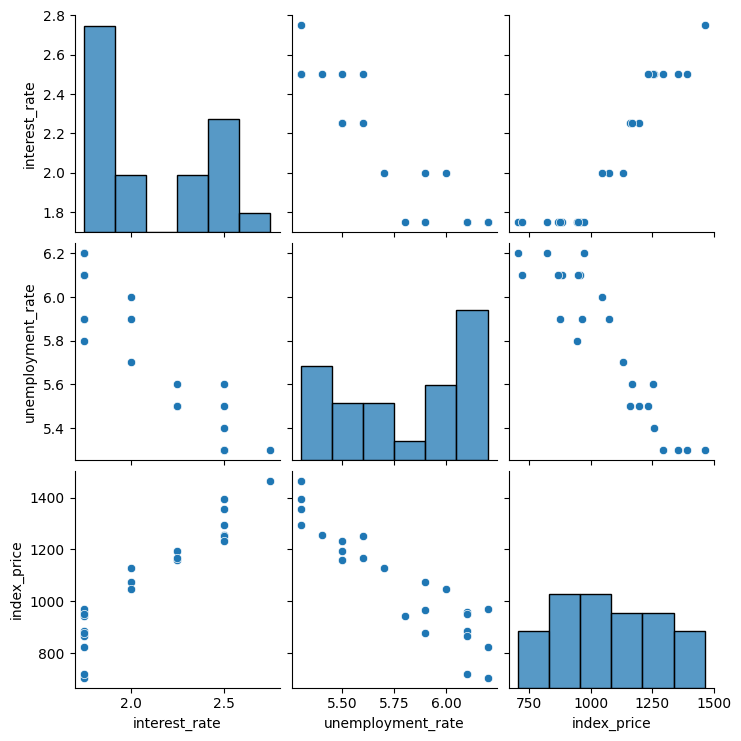

In [7]:
## Lets do some viualization
import seaborn as sns
sns.pairplot(df_index)

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

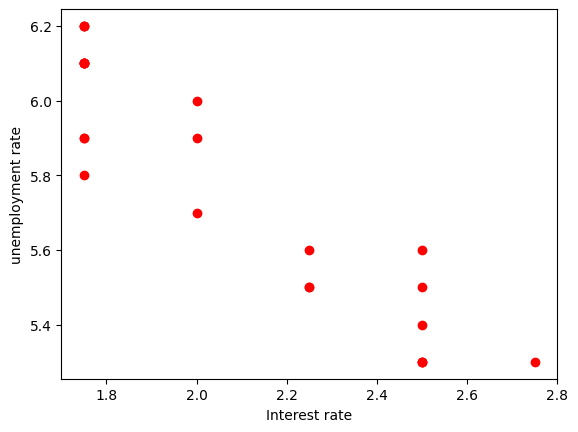

In [9]:
## Visualiza the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

In [10]:
##independent and dependent features
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [11]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [12]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [13]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

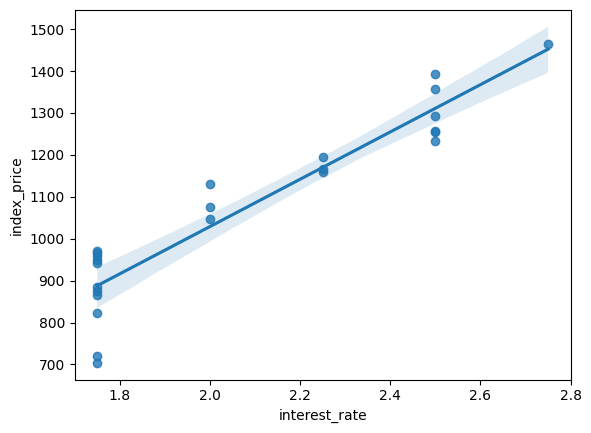

In [16]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

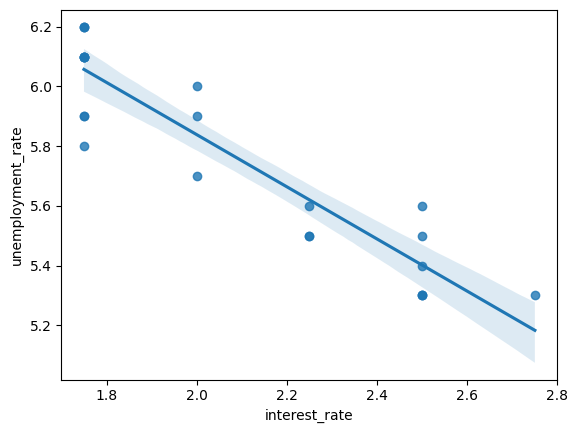

In [18]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

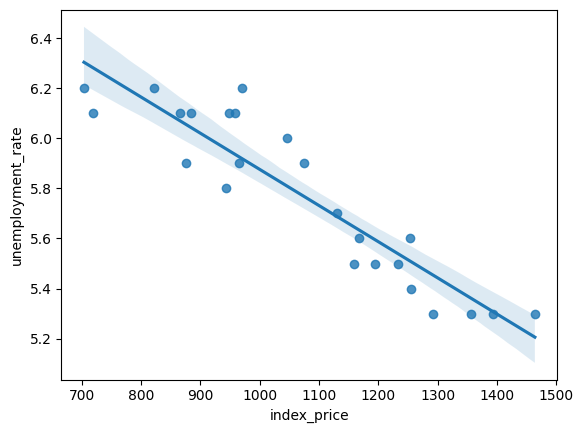

In [20]:
sns.regplot(x=df_index['index_price'], y=df_index['unemployment_rate'])

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
X_train

,interest_rate,unemployment_rate
13,1.75,5.9
1,2.50,5.3
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3
12,2.00,6.0
15,1.75,6.1
3,2.50,5.3
4,2.50,5.4
22,1.75,6.2


In [23]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [24]:
regression.fit(X_train,y_train)

LinearRegression()

In [25]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [26]:
np.mean(validation_score)

np.float64(-5914.82818016241)

In [27]:
## prediction
y_pred=regression.predict(X_test)

In [28]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [29]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712554
59.935781523235505
76.11677139574796


In [30]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.827897809145715
0.7131630152428583


## Assumptions

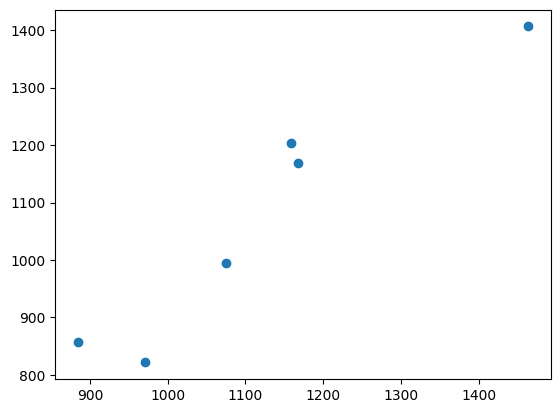

In [31]:
plt.scatter(y_test,y_pred)

In [32]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


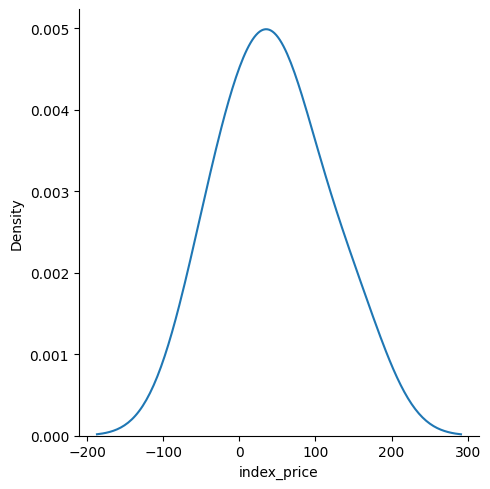

In [33]:
## Plot this residuals
sns.displot(residuals,kind='kde')

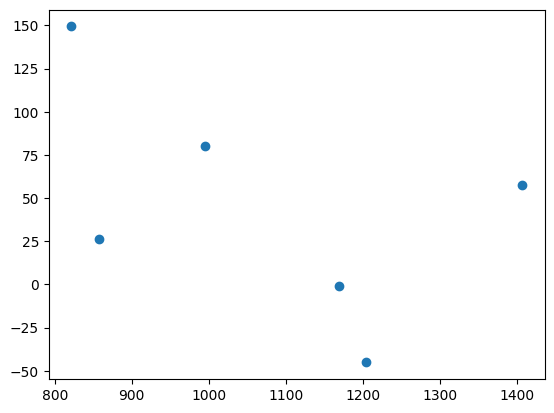

In [34]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [35]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1468.
Date:                Sat, 12 Jul 2025   Prob (F-statistic):                    7.46e-19
Time:                        11:46:45   Log-Likelihood:                         -104.21
No. Observations:                  18   AIC:                                      212.4
Df Residuals:                      16   BIC:                                      214.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
interest_rate       569.9494     44.349     12.851      0.000     475.933     663.965
unemployment_rate   -20.5734     15.966     -1.289      0.216     -54.421      13.274
==============================================================================
Omnibus:                        1.657   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.437   Jarque-Bera (JB):                1.346
Skew:                          -0.611   Prob(JB):                        0.510
Kurtosis:                       2.451   Cond. No.                         14.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
print(regression.coef_)

[ 260.33709119 -360.58377051]
